In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

In [2]:
# Set the repository root as a working directory

%cd ..

c:\_dex\dvc_test\dvc_course_ds_base


c:\_dex\dvc_test\dvc_course_ds_base\venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [ ]:
import sys
from pathlib import Path

# Add the project root directory to Python path
project_root = str(Path.cwd())
if project_root not in sys.path:
    sys.path.append(project_root)

# View `params.yaml` config

In [3]:
# Look on stages config

import yaml

with open('params.yaml', 'r') as f:
    params = yaml.safe_load(f)
params



{'base': {'random_state': 42, 'log_level': 'INFO'},
 'data_load': {'dataset_csv': 'data/raw/iris.csv'},
 'featurize': {'features_path': 'data/processed/featured_iris.csv',
  'target_column': 'target'},
 'data_split': {'test_size': 0.2,
  'trainset_path': 'data/processed/train_iris.csv',
  'testset_path': 'data/processed/test_iris.csv'},
 'train': {'cv': 3,
  'estimator_name': 'logreg',
  'estimators': {'logreg': {'param_grid': {'C': [0.001],
     'max_iter': [100],
     'solver': ['lbfgs'],
     'multi_class': ['multinomial']}},
   'svm': {'param_grid': {'C': [0.1, 1.0],
     'kernel': ['rbf', 'linear'],
     'gamma': ['scale'],
     'degree': [3, 5]}}},
  'model_path': 'models/model.joblib'},
 'evaluate': {'reports_dir': 'reports',
  'metrics_file': 'metrics.json',
  'confusion_matrix_image': 'confusion_matrix.png'}}

# Load data

- src/stages/data_load.py

## Run as Python function 

In [4]:
from src.stages.data_load import data_load

data_load('params.yaml')

2025-07-03 12:52:25,194 — DATA_LOAD — INFO — Get dataset
2025-07-03 12:52:25,199 — DATA_LOAD — INFO — Save raw data
2025-07-03 12:52:25,199 — DATA_LOAD — INFO — Save raw data


## Run as Python module

In [5]:
!python src/stages/data_load.py --config=params.yaml

Traceback (most recent call last):
  File "c:\_dex\dvc_test\dvc_course_ds_base\src\stages\data_load.py", line 6, in <module>
    from src.utils.logs import get_logger
ModuleNotFoundError: No module named 'src'


In [6]:
import os
from pathlib import Path

# Set PYTHONPATH environment variable
os.environ['PYTHONPATH'] = str(Path.cwd())

!python src/stages/data_load.py --config=params.yaml

# Raw Iris dataset saved

!dir data\raw

2025-07-03 12:52:33,387 — DATA_LOAD — INFO — Get dataset
2025-07-03 12:52:33,391 — DATA_LOAD — INFO — Save raw data
 Volume in drive C has no label.
 Volume Serial Number is 184C-5BB3

 Directory of c:\_dex\dvc_test\dvc_course_ds_base\data\raw

03.07.2025  10:39    <DIR>          .
03.07.2025  10:39    <DIR>          ..
03.07.2025  12:52             2.908 iris.csv
               1 File(s)          2.908 bytes
               2 Dir(s)  223.530.422.272 bytes free
 Volume in drive C has no label.
 Volume Serial Number is 184C-5BB3

 Directory of c:\_dex\dvc_test\dvc_course_ds_base\data\raw

03.07.2025  10:39    <DIR>          .
03.07.2025  10:39    <DIR>          ..
03.07.2025  12:52             2.908 iris.csv
               1 File(s)          2.908 bytes
               2 Dir(s)  223.530.422.272 bytes free


# Extract features

- `src/stages/featurize.py`

In [7]:
!python src/stages/featurize.py --config=params.yaml

2025-07-03 12:52:41,515 — FEATURIZE — INFO — Load raw data
2025-07-03 12:52:41,516 — FEATURIZE — INFO — Extract features
2025-07-03 12:52:41,516 — FEATURIZE — INFO — Save features


In [8]:
# Features.csv file has created
!dir data\processed

 Volume in drive C has no label.
 Volume Serial Number is 184C-5BB3

 Directory of c:\_dex\dvc_test\dvc_course_ds_base\data\processed

03.07.2025  10:41    <DIR>          .
03.07.2025  10:39    <DIR>          ..
03.07.2025  12:52             7.411 featured_iris.csv
03.07.2025  12:45             1.523 test_iris.csv
03.07.2025  12:45             5.845 train_iris.csv
               3 File(s)         14.779 bytes
               2 Dir(s)  223.530.418.176 bytes free


# Split train/test dataset

- `src/stages/data_split.py`

In [9]:
!python src/stages/data_split.py --config=params.yaml

2025-07-03 12:52:42,807 — DATA_SPLIT — INFO — Load features
2025-07-03 12:52:42,807 — DATA_SPLIT — INFO — Split features into train and test sets
2025-07-03 12:52:42,811 — DATA_SPLIT — INFO — Save train and test sets


In [10]:
# Train and Test datasets have created
!dir data\processed

 Volume in drive C has no label.
 Volume Serial Number is 184C-5BB3

 Directory of c:\_dex\dvc_test\dvc_course_ds_base\data\processed

03.07.2025  10:41    <DIR>          .
03.07.2025  10:39    <DIR>          ..
03.07.2025  12:52             7.411 featured_iris.csv
03.07.2025  12:52             1.523 test_iris.csv
03.07.2025  12:52             5.845 train_iris.csv
               3 File(s)         14.779 bytes
               2 Dir(s)  223.530.414.080 bytes free


# Train model

- `src/stages/train.py`

In [11]:
!python src/stages/train.py --config=params.yaml

2025-07-03 12:52:44,238 — TRAIN — INFO — Get estimator name
2025-07-03 12:52:44,238 — TRAIN — INFO — Estimator: logreg
2025-07-03 12:52:44,238 — TRAIN — INFO — Load train dataset
2025-07-03 12:52:44,238 — TRAIN — INFO — Train model
Fitting 3 folds for each of 1 candidates, totalling 3 fits
2025-07-03 12:52:44,259 — TRAIN — INFO — Best score: 0.857564307288572
2025-07-03 12:52:44,259 — TRAIN — INFO — Save model


c:\_dex\dvc_test\dvc_course_ds_base\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\_dex\dvc_test\dvc_course_ds_base\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\_dex\dvc_test\dvc_course_ds_base\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\_dex\dvc_test\dvc_course_ds_base\venv\lib\site-packages\sklearn\linear_model\_logisti

In [12]:
# model is created
!dir models

 Volume in drive C has no label.
 Volume Serial Number is 184C-5BB3

 Directory of c:\_dex\dvc_test\dvc_course_ds_base\models

03.07.2025  10:42    <DIR>          .
03.07.2025  11:48    <DIR>          ..
03.07.2025  12:52             2.931 model.joblib
               1 File(s)          2.931 bytes
               2 Dir(s)  223.530.414.080 bytes free


# Evaluate model 

- `src/stages/evaluate.py`

In [13]:
!python src/stages/evaluate.py --config=params.yaml

2025-07-03 12:52:46,059 — EVALUATE — INFO — Load model
2025-07-03 12:52:46,125 — EVALUATE — INFO — Load test dataset
2025-07-03 12:52:46,129 — EVALUATE — INFO — Evaluate (build report)
2025-07-03 12:52:46,129 — EVALUATE — INFO — Save metrics
2025-07-03 12:52:46,129 — EVALUATE — INFO — F1 metrics file saved to : reports\metrics.json
2025-07-03 12:52:46,129 — EVALUATE — INFO — Save confusion matrix
2025-07-03 12:52:46,746 — EVALUATE — INFO — Confusion matrix saved to : reports\confusion_matrix.png


In [14]:
# metrics file metrics.json is created
!dir reports

 Volume in drive C has no label.
 Volume Serial Number is 184C-5BB3

 Directory of c:\_dex\dvc_test\dvc_course_ds_base\reports

03.07.2025  10:42    <DIR>          .
03.07.2025  11:48    <DIR>          ..
03.07.2025  12:52            22.267 confusion_matrix.png
03.07.2025  12:52                32 metrics.json
               2 File(s)         22.299 bytes
               2 Dir(s)  223.530.409.984 bytes free


In [15]:
!type reports\metrics.json

{"f1_score": 0.9305555555555555}


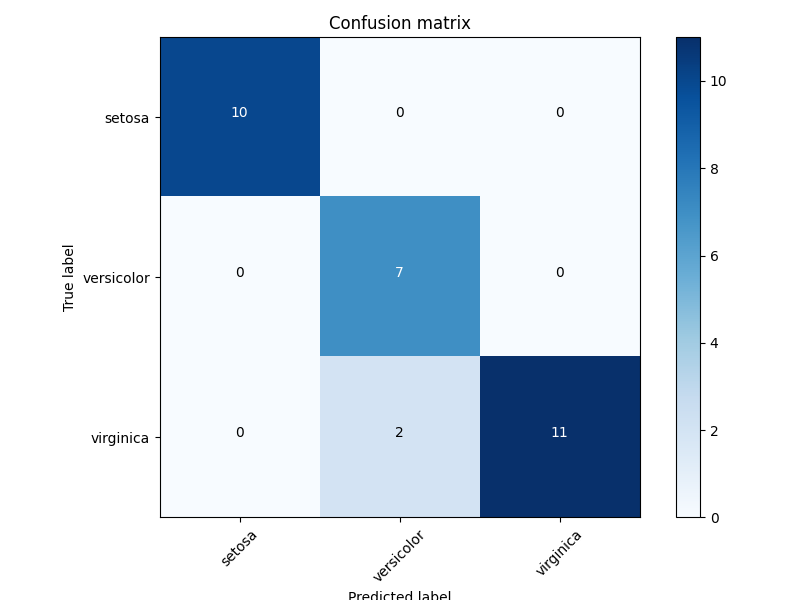

In [16]:
# Display confusion matrix

from IPython.display import Image
Image('reports/confusion_matrix.png')